In [1]:
import pandas as pd
energydata=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
print(energydata)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.0

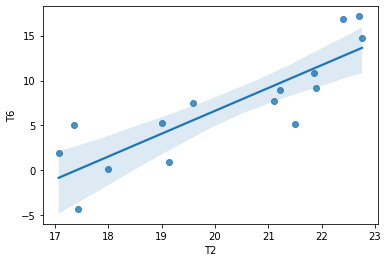

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
simple_linear_regression_energydata = energydata[['T2', 'T6']].sample(15, random_state=2)
sns.regplot(x="T2", y="T6", data = simple_linear_regression_energydata)

In [4]:
energydata = energydata.drop(columns = ['date','lights'])
print(energydata)

       Appliances         T1       RH_1         T2       RH_2         T3  \
0              60  19.890000  47.596667  19.200000  44.790000  19.790000   
1              60  19.890000  46.693333  19.200000  44.722500  19.790000   
2              50  19.890000  46.300000  19.200000  44.626667  19.790000   
3              50  19.890000  46.066667  19.200000  44.590000  19.790000   
4              60  19.890000  46.333333  19.200000  44.530000  19.790000   
...           ...        ...        ...        ...        ...        ...   
19730         100  25.566667  46.560000  25.890000  42.025714  27.200000   
19731          90  25.500000  46.500000  25.754000  42.080000  27.133333   
19732         270  25.500000  46.596667  25.628571  42.768571  27.050000   
19733         420  25.500000  46.990000  25.414000  43.036000  26.890000   
19734         430  25.500000  46.600000  25.264286  42.971429  26.823333   

            RH_3         T4       RH_4         T5  ...         T9     RH_9  \
0      44

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalised_energydata = pd.DataFrame(scaler.fit_transform(energydata), columns=['Appliances','T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3','T4', 'RH_4', 'T5','RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility ', 'Tdewpoint', 'rv1', 'rv2'])
features = normalised_energydata.drop(columns=['Appliances'])
target_variable = normalised_energydata ['Appliances']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.3, random_state=42)


from sklearn import linear_model
linear_model =  linear_model.LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

#r2
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)


0.15

In [7]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)
print(mae)

0.05013362397742957


In [8]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2) 

45.35

In [9]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [10]:
#coefficient of determination
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
#comparing the effects of regularisation
def get_weights_energy_data(model, feat, col_name):
#this function returns the weight of every feature

 weights = pd.Series(model.coef_, feat.columns).sort_values()
 weights_energydata = pd.DataFrame(weights).reset_index()
 weights_energydata.columns = ['Features', col_name]
 weights_energydata[col_name].round(3)
 return weights_energydata

linear_model_weights = get_weights_energydata (linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_energydata = get_weights_energydata (ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_energydata = get_weights_energydata (lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_energydata, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_energydata, on='Features')
print(final_weights)

       Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0          RH_2            -0.456698     -0.119070     -0.000000
1         T_out            -0.321860     -0.056858      0.000000
2            T2            -0.236178      0.000486      0.000000
3            T9            -0.189941     -0.137461     -0.000000
4          RH_8            -0.157595     -0.135209     -0.000110
5        RH_out            -0.077671     -0.008632     -0.049557
6          RH_7            -0.044614     -0.055982     -0.000000
7          RH_9            -0.039800     -0.049351     -0.000000
8            T5            -0.015657     -0.044279     -0.000000
9            T1            -0.003281     -0.065026      0.000000
10          rv1             0.000770      0.000589     -0.000000
11          rv2             0.000770      0.000589     -0.000000
12  Press_mm_hg             0.006839      0.001423     -0.000000
13           T7             0.010319     -0.003969     -0.000000
14  Visibility           

In [40]:
rr = Ridge(alpha=0.04)
rr.fit(x_train, y_train) 
pred_train_rr= rr.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))

0.08898674137699943


In [35]:
model_lasso = Lasso(alpha=0.001)
model_lasso.fit(x_train, y_train) 
pred_train_lasso= model_lasso.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

0.09501109253338288
